In [110]:

"""
supp:
y'(t) = f(y(t), t)
y(0) = y_0

discret:
y_{i+1} = y_i + \Delta t f(y_i, t_i), i=0,...,N-1
y(0) = y_0
t_{i+1} - t_i = \Delta t


sample 1d function

input: y0
output: 
    y0, y1, ..., yN
    t0, t1, ..., tN


ex. 1
 - f known explicitely - compare...
 - give model data from y

ex. 2
 - f not know ?
"""

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_10305/684250453.py:1: SyntaxWarning: invalid escape sequence '\D'
  """


"\nsupp:\ny'(t) = f(y(t), t)\ny(0) = y_0\n\ndiscret:\ny_{i+1} = y_i + \\Delta t f(y_i, t_i), i=0,...,N-1\ny(0) = y_0\nt_{i+1} - t_i = \\Delta t\n\n\nsample 1d function\n\ninput: y0\noutput: \n    y0, y1, ..., yN\n    t0, t1, ..., tN\n\n\nex. 1\n - f known explicitely - compare...\n - give model data from y\n\nex. 2\n - f not know ?\n"

In [111]:
import torch

In [112]:
f = lambda t: -2*t + 1.2
y = lambda t: -t**2 + 1.2*t + 0.1

def Euler(f, y0, t):
    y = torch.zeros_like(t)
    y[0] = y0
    for i in range(len(t)-1): 
        y[i+1] = y[i] + (t[i+1]-t[i]) * f((t[i+1]+t[i])/2)
    return y

In [113]:
t_min, t_max = 0, 1.5
ss = 0.1
n_timesteps = 20
t_data = torch.linspace(t_min, t_max+ss, n_timesteps)
y_data = y(t_data)

In [114]:
from matplotlib import pyplot as plt

In [115]:
y_euler = Euler(f, y_data[0], t_data)
y_euler

tensor([ 0.1000,  0.1940,  0.2737,  0.3393,  0.3907,  0.4280,  0.4510,  0.4599,
         0.4546,  0.4351,  0.4014,  0.3535,  0.2915,  0.2152,  0.1248,  0.0202,
        -0.0986, -0.2315, -0.3787, -0.5400])

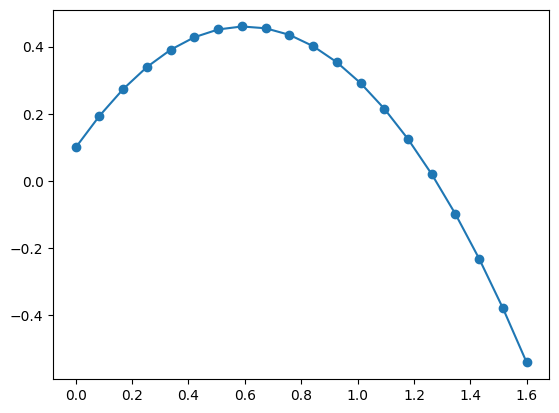

In [116]:
plt.scatter(t_data, y_data)
plt.plot(t_data, y_euler)

In [117]:
n_experiments = 1000
max_err = 0.05
noise = max_err * 2 * (torch.rand(n_experiments, n_timesteps) - 0.5)
Y = noise + y_data

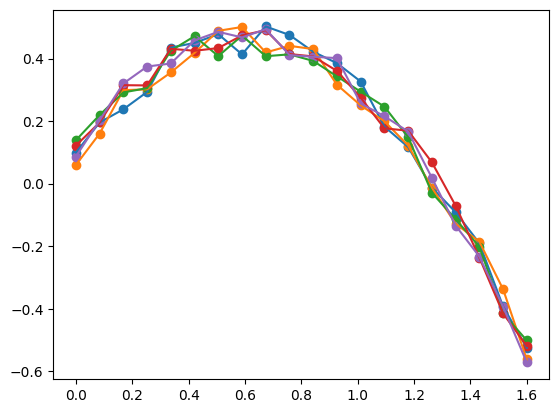

In [118]:
for n in range(5):
    plt.scatter(t_data, Y[-n])
    plt.plot(t_data, Y[-n])

dataset: Y = n_experiments x n_timesteps

input:
    for NN: y0
    for ode solver: t_data

output:
    for NN: 

In [119]:
input_size = 1
hidden_size = 10
f_model = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, 1),
) # t -> f(t)
f_mod_wrap = lambda x: f_model(torch.tensor([x]))
optimizer = torch.optim.Adam(f_model.parameters(), lr=0.001)

Y_preds = torch.zeros_like(Y)
f_model.train()
for e in range(n_experiments):
    y_exper = Y[e]
    y_euler = Euler(f_mod_wrap, y_exper[0], t_data)

    optimizer.zero_grad() # Clear gradients
    loss = 1/n_timesteps * torch.sum((y_euler - y_exper)**2)
    print(loss)
    loss.backward() # Backpropagation
    optimizer.step() # Update weights
    Y_preds[e] = y_euler

tensor(0.0975, grad_fn=<MulBackward0>)
tensor(0.0925, grad_fn=<MulBackward0>)
tensor(0.0960, grad_fn=<MulBackward0>)
tensor(0.0924, grad_fn=<MulBackward0>)
tensor(0.1026, grad_fn=<MulBackward0>)
tensor(0.0880, grad_fn=<MulBackward0>)
tensor(0.0865, grad_fn=<MulBackward0>)
tensor(0.0981, grad_fn=<MulBackward0>)
tensor(0.0936, grad_fn=<MulBackward0>)
tensor(0.0881, grad_fn=<MulBackward0>)
tensor(0.0922, grad_fn=<MulBackward0>)
tensor(0.0794, grad_fn=<MulBackward0>)
tensor(0.0903, grad_fn=<MulBackward0>)
tensor(0.1016, grad_fn=<MulBackward0>)
tensor(0.0866, grad_fn=<MulBackward0>)
tensor(0.0837, grad_fn=<MulBackward0>)
tensor(0.0919, grad_fn=<MulBackward0>)
tensor(0.0901, grad_fn=<MulBackward0>)
tensor(0.0841, grad_fn=<MulBackward0>)
tensor(0.1056, grad_fn=<MulBackward0>)
tensor(0.0995, grad_fn=<MulBackward0>)
tensor(0.0931, grad_fn=<MulBackward0>)
tensor(0.0877, grad_fn=<MulBackward0>)
tensor(0.0996, grad_fn=<MulBackward0>)
tensor(0.0827, grad_fn=<MulBackward0>)
tensor(0.0790, grad_fn=<M

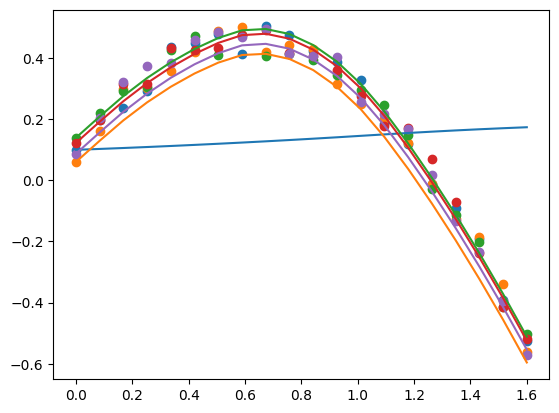

In [120]:
for n in range(5):
    plt.scatter(t_data, Y[-n].detach())
    plt.plot(t_data, Y_preds[-n].detach())

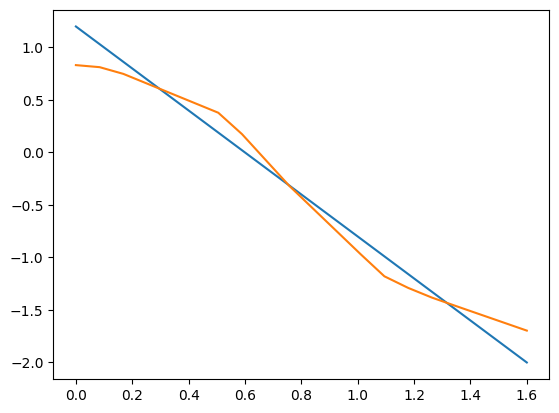

In [121]:
plt.plot(t_data, f(t_data))
plt.plot(t_data, [f_model.forward(torch.tensor([t])).detach() for t in t_data])